This notebook plots the ICESat-2 ATL06 points-per-area for every 10x10 km point in the Arctic and Antarctic.

Then, it saves the data to TIFF files.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from geocube.api.core import make_geocube
import rioxarray as rxr

%matplotlib widget

# Antarctica

In [2]:
pickle_path = './Data/cycle_05antarctic.pickle' # Change pickle path as needed
cycle_num = pickle_path[13:15]

with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

In [3]:
xs_ant = []
ys_ant = []
sizes_ant = []

for n, s in data.items():
    if 'E_' in n:
        part = n.partition('E_')
        xs_ant.append(float(part[0]))
        ys_ant.append(float(part[2][:-1]))
    sizes_ant.append(s)
    
sizes_ant = np.array(sizes_ant)
xs_ant = np.array(xs_ant)
ys_ant = np.array(ys_ant)

sizes_ant = sizes_ant.astype('f')
sizes_ant[sizes_ant == 0] = np.nan

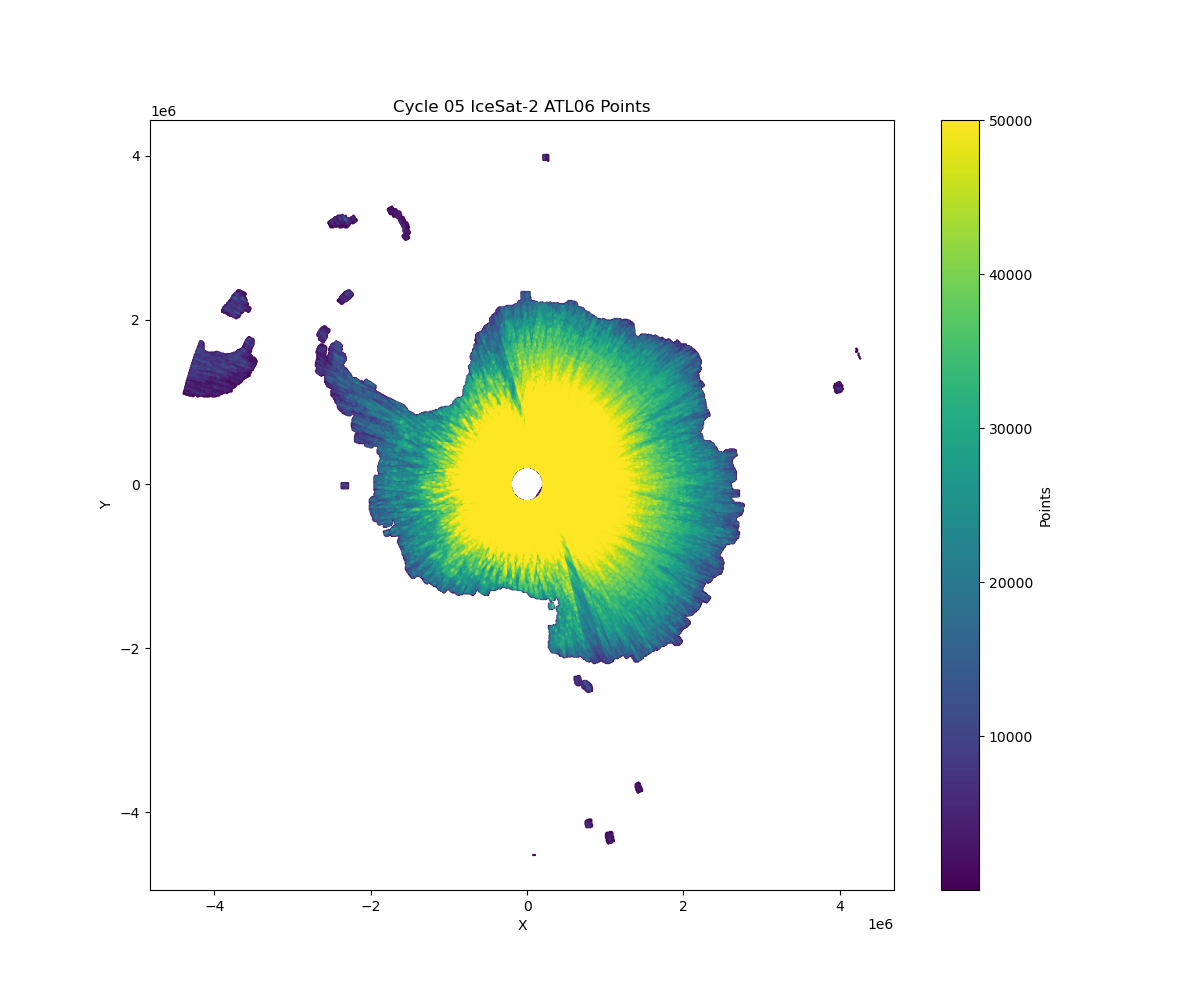

In [4]:
fig1 = plt.figure(figsize=(12,10))
isort = np.argsort(sizes_ant)
plt.scatter(np.array(xs_ant)[isort], np.array(ys_ant)[isort], c=sizes_ant[isort], vmax=50000, cmap='viridis', s=.5)
plt.colorbar(label='Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Cycle {cycle_num} IceSat-2 ATL06 Points")
plt.show()

plt.savefig(f'./Figures/cycle_{cycle_num}_atl06_antarctic_point_numbers.png', dpi=300)

### Rasterize Antarctic Data

In [5]:
def sum_rasterize(values=None, **kwargs):
    # values is a numpy array of all values for that pixel
    return np.sum(values)

# Put into a GeoDataFrame
df = pd.DataFrame({"x": xs_ant, "y": ys_ant, "value": sizes_ant})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:3031")  # change CRS if needed

# Rasterize with geocube
cube = make_geocube(
    vector_data=gdf,
    measurements=["value"],
    resolution=(-10000, 10000),  # set pixel size in x/y units (e.g. 1 km)
    fill=np.nan,               # what to fill where no data
    rasterize_function=sum_rasterize() # sum overlapping points
)

# Save to GeoTIFF
cube["value"].rio.to_raster(f"./cycle_{cycle_num}_atl06_antarctic_point_numbers.tif")

<xarray.DataArray (band: 1, y: 853, x: 865)> Size: 3MB
[737845 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB -4.385e+06 -4.375e+06 ... 4.245e+06 4.255e+06
  * y            (y) float64 7kB 4.005e+06 3.995e+06 ... -4.505e+06 -4.515e+06
    spatial_ref  int64 8B 0
Attributes:
    long_name:      value
    name:           value
    AREA_OR_POINT:  Area
    _FillValue:     nan
    scale_factor:   1.0
    add_offset:     0.0


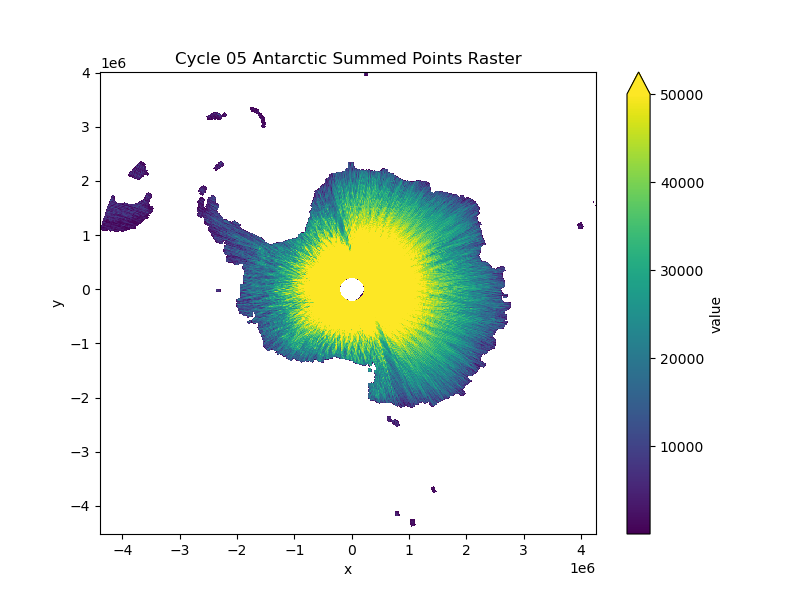

In [6]:
# Open your raster
da = rxr.open_rasterio(f"./cycle_{cycle_num}_atl06_antarctic_point_numbers.tif")

print(da)

# Plot the raster (first band if single-band)
plt.figure(figsize=(8,6))
da.plot(cmap="viridis", vmax=50000)
plt.title(f"Cycle {cycle_num} Antarctic Summed Points Raster")
plt.show()

# Arctic

In [ ]:
pickle_path = './Data/cycle_01arctic.pickle' # Change pickle path as needed
cycle_num = pickle_path[13:15]

with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

In [ ]:
xs_arc = []
ys_arc = []
sizes_arc = []

for n, s in data.items():
    if 'E_' in n:
        part = n.partition('E_')
        xs_arc.append(float(part[0]))
        ys_arc.append(float(part[2][:-1]))
    sizes_arc.append(s)
    
sizes_arc = np.array(sizes_arc)
xs_arc = np.array(xs_arc)
ys_arc = np.array(ys_arc)

sizes_arc = sizes_arc.astype('f')
sizes_arc[sizes_arc == 0] = np.nan

In [ ]:
fig1 = plt.figure(figsize=(12,10))
isort = np.argsort(sizes_arc)
plt.scatter(np.array(xs_arc)[isort], np.array(ys_arc)[isort], c=sizes_arc[isort], vmax=50000, cmap='viridis', s=.5)
plt.colorbar(label='Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Cycle {cycle_num} IceSat-2 Points")
plt.show()

plt.savefig(f'./Figures/cycle_{cycle_num}_arctic_point_numbers.png', dpi=300)

### Rasterize Arctic data

In [ ]:
def sum_rasterize(values=None, **kwargs):
    # values is a numpy array of all values for that pixel
    return np.sum(values)

# Put into a GeoDataFrame
df = pd.DataFrame({"x": xs_arc, "y": ys_arc, "value": sizes_arc})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:3031")  # change CRS if needed

# Rasterize with geocube
cube = make_geocube(
    vector_data=gdf,
    measurements=["value"],
    resolution=(-10000, 10000),  # set pixel size in x/y units (e.g. 1 km)
    fill=np.nan,               # what to fill where no data
    rasterize_function=sum_rasterize() # sum overlapping points
)

# Save to GeoTIFF
cube["value"].rio.to_raster(f"./cycle_{cycle_num}_atl06_arctic_point_numbers.tif")

In [ ]:
# Open your raster
da = rxr.open_rasterio(f"./cycle_{cycle_num}_atl06_arctic_point_numbers.tif")

print(da)

# Plot the raster (first band if single-band)
plt.figure(figsize=(8,6))
da.plot(cmap="viridis", vmax=50000)
plt.title("Summed Points Raster")
plt.show()